In [2]:
import pandas as pd
import numpy as np
print(pd.__version__)

1.0.5


In [2]:
dhs_info = pd.read_table("DHS-ATAC-intersect.bed", names="chr start end identifier mean_signal numsamples summit core_start core_end component cuts".split(), header=None)
dhs_info.head(5)

,chr,start,end,identifier,mean_signal,numsamples,summit,core_start,core_end,component,cuts
0,chr12,10090,10340,12.100082,0.401386,5,10190,10152.0,10268.0,Musculoskeletal,8
1,chr12,10617,10696,12.100084,0.544882,18,10670,10578.0,10690.0,Placental / trophoblast,1
2,chr12,11003,11180,12.100086,1.550503,30,11030,11010.0,11130.0,Placental / trophoblast,18
3,chr12,12403,12596,12.100088,0.219142,15,12490,12490.0,12523.0,Musculoskeletal,3
4,chr12,12689,12756,12.100090,0.196649,1,12690,12690.0,12690.0,Organ devel. / renal,0


In [3]:
dhs_info['cuts_per_base'] = dhs_info.cuts / (dhs_info.end - dhs_info.start)
dhs_info['log_cuts_per_base'] = np.arcsinh(dhs_info['cuts_per_base'])

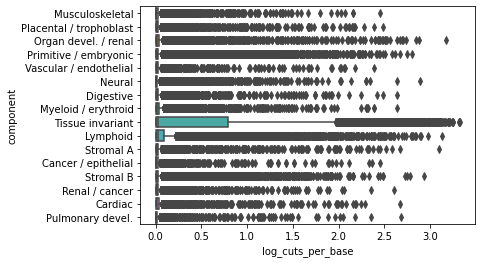

In [4]:
import seaborn
seaborn.boxplot(x='log_cuts_per_base', y='component', data=dhs_info)

In [9]:
negative_cuts = dhs_info.query('log_cuts_per_base < 1.0')
positive_cuts = dhs_info.query('log_cuts_per_base > 1.0')
negative_cuts.to_csv("negative_cuts_lessthan1.bed", header=None, sep="\t", index=None)
positive_cuts.to_csv("positive_cuts_morethan1.bed", header=None, sep="\t", index=None)

In [18]:
len(negative_cuts) + len(positive_cuts)

172683

(array([1.57564e+05, 4.81200e+03, 2.11600e+03, 1.35400e+03, 9.52000e+02,
        7.78000e+02, 6.62000e+02, 5.63000e+02, 4.89000e+02, 4.08000e+02,
        3.89000e+02, 3.40000e+02, 2.78000e+02, 2.55000e+02, 2.23000e+02,
        2.07000e+02, 1.52000e+02, 1.73000e+02, 1.26000e+02, 1.36000e+02,
        1.28000e+02, 1.11000e+02, 1.21000e+02, 8.60000e+01, 8.10000e+01,
        6.50000e+01, 5.60000e+01, 3.40000e+01, 1.70000e+01, 7.00000e+00]),
 array([0.        , 0.11088506, 0.22177011, 0.33265517, 0.44354022,
        0.55442528, 0.66531033, 0.77619539, 0.88708044, 0.9979655 ,
        1.10885055, 1.21973561, 1.33062066, 1.44150572, 1.55239078,
        1.66327583, 1.77416089, 1.88504594, 1.995931  , 2.10681605,
        2.21770111, 2.32858616, 2.43947122, 2.55035627, 2.66124133,
        2.77212638, 2.88301144, 2.99389649, 3.10478155, 3.21566661,
        3.32655166]),
 <a list of 30 Patch objects>)

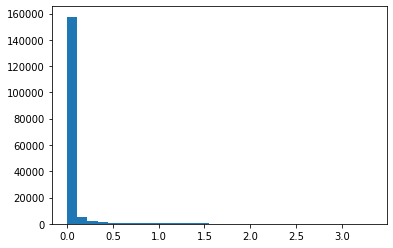

In [7]:
import pylab
pylab.hist(dhs_info.drop_duplicates("chr start end".split()).log_cuts_per_base, 30)

In [3]:
pd.read_table("new_footprint_positivecuts.bed", names="chr start end identifier mean_signal numsamples summit core_start core_end component cuts".split(), header=None)

chr  \
chr12 388875    388885    NFKB/1     0 - 388875    388885    41,255,205 NFKB2_HUMAN.H11MO.0.B 7.4062 NFAT 4  chr12 388872    389084     12.102672   
      388876    388896    GC-tract   0 - 388876    388896    0,28,255   MAZ_HUMAN.H11MO.0.A   6.9132 C2H2 4  chr12 388872    389084     12.102672   
                388893    KLF/SP/2   0 - 388876    388893    0,28,255   SP5_MOUSE.H11MO.0.C   8.7803 C2H2 1  chr12 388872    389084     12.102672   
      388877    388889    SPI        0 - 388877    388889    5,236,241  Spic.mouse_ETS_1      6.1881 ETS  1  chr12 388872    389084     12.102672   
      388878    388895    KLF/SP/2   0 - 388878    388895    0,28,255   SP5_MOUSE.H11MO.0.C   7.5245 C2H2 1  chr12 388872    389084     12.102672   
...                                                                                                                                           ...   
      133181474 133181483 CCAAT/CEBP 0 + 133181474 133181483 0,8,255    CEBPD_MA0836.1        8.7564 bZIP 12 chr12 133181320 133181540  12.999274   
                          CREB/ATF/1 0 - 133181474 133181483 0,8,255    FOSL1+JUN_MA1129.1    7.9579 bZIP 2  chr12 133181320 133181540  12.999274   
      133181475 133181486 YY1        0 - 133181475 133181486 0,28,255   YY2_C2H2_3            6.2875 C2H2 1  chr12 133181320 133181540  12.999274   
      133181479 133181489 ETS/1      0 - 133181479 133181489 5,236,241  ELK1_HUMAN.H11MO.0.B  7.3860 ETS  2  chr12 133181320 133181540  12.999274   
      133181507 133181527 GC-tract   0 - 133181507 133181527 0,28,255   THAP1_HUMAN.H11MO.0.C 8.7785 C2H2 1  chr12 133181320 133181540  12.999274   

                                                                                                                                           start  \
chr12 388875    388885    NFKB/1     0 - 388875    388885    41,255,205 NFKB2_HUMAN.H11MO.0.B 7.4062 NFAT 4  chr12 388872    389084     0.852214   
      388876    388896    GC-tract   0 - 388876    388896    0,28,255   MAZ_HUMAN.H11MO.0.A   6.9132 C2H2 4  chr12 388872    389084     0.852214   
                388893    KLF/SP/2   0 - 388876    388893    0,28,255   SP5_MOUSE.H11MO.0.C   8.7803 C2H2 1  chr12 388872    389084     0.852214   
      388877    388889    SPI        0 - 388877    388889    5,236,241  Spic.mouse_ETS_1      6.1881 ETS  1  chr12 388872    389084     0.852214   
      388878    388895    KLF/SP/2   0 - 388878    388895    0,28,255   SP5_MOUSE.H11MO.0.C   7.5245 C2H2 1  chr12 388872    389084     0.852214   
...                                                                                                                                          ...   
      133181474 133181483 CCAAT/CEBP 0 + 133181474 133181483 0,8,255    CEBPD_MA0836.1        8.7564 bZIP 12 chr12 133181320 133181540  4.842609   
                          CREB/ATF/1 0 - 133181474 133181483 0,8,255    FOSL1+JUN_MA1129.1    7.9579 bZIP 2  chr12 133181320 133181540  4.842609   
      133181475 133181486 YY1        0 - 133181475 133181486 0,28,255   YY2_C2H2_3            6.2875 C2H2 1  chr12 133181320 133181540  4.842609   
      133181479 133181489 ETS/1      0 - 133181479 133181489 5,236,241  ELK1_HUMAN.H11MO.0.B  7.3860 ETS  2  chr12 133181320 133181540  4.842609   
      133181507 133181527 GC-tract   0 - 133181507 133181527 0,28,255   THAP1_HUMAN.H11MO.0.C 8.7785 C2H2 1  chr12 133181320 133181540  4.842609   

                                                                                                                                        end  \
chr12 388875    388885    NFKB/1     0 - 388875    388885    41,255,205 NFKB2_HUMAN.H11MO.0.B 7.4062 NFAT 4  chr12 388872    389084     172   
      388876    388896    GC-tract   0 - 388876    388896    0,28,255   MAZ_HUMAN.H11MO.0.A   6.9132 C2H2 4  chr12 388872    389084     172   
                388893    KLF/SP/2   0 - 388876    388893    0,28,255   SP5_MOUSE.H11MO.0.C   8.7803 C2H2 1  chr12 388872    389084     172   
    